In [2]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
df = pd.read_csv('allmovies_cleaned.csv')
df

cols = df.date.str.split('-', expand=True)

cols 

,0,1,2
0,2005,09,06
1,2005,05,13
2,2005,10,19
3,2005,12,26
4,2004,05,03
...,...,...,...
6385264,2005,09,09
6385265,2005,09,12
6385266,2005,10,21
6385267,2005,10,24


In [4]:
quarter = {'01':1, '02':1, '03':1,
           '04':2, '05':2, '06':2, 
            '07':3, '08':3, '09':3,
          '10':4, '11':4, '12':4}


cols['quarter'] = cols.iloc[:,1].replace(quarter)

cols

,0,1,2,quarter
0,2005,09,06,3
1,2005,05,13,2
2,2005,10,19,4
3,2005,12,26,4
4,2004,05,03,2
...,...,...,...,...
6385264,2005,09,09,3
6385265,2005,09,12,3
6385266,2005,10,21,4
6385267,2005,10,24,4


In [5]:
df['year'] = cols.iloc[:,0]
df['quarter'] = cols['quarter']



In [6]:

df = df[['movie', 'year', 'quarter', 'rating']]
df.to_csv('./allmovies_cleaned_quarter.csv')

In [7]:
# Group by quarter 

grouped = df.groupby(['year','quarter', 'movie']).mean().reset_index() 

In [8]:
grouped.to_csv('./allmovies_cleaned_quarter_mean.csv')

In [9]:
grouped
grouped['year_quarter'] = grouped['year']+'_' + grouped['quarter'].astype(str)

pivot = grouped.pivot_table(columns='movie', 
                            index='year_quarter', values='rating')


pivot = pivot.fillna(0)

In [10]:
pivot = pivot.sort_values('year_quarter', ascending=True)
pivot

movie,1,2,3,4,5,6,7,8,9,10,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
year_quarter,,,,,,,,,,,,,,,,,,,,,
1999_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.428571
2000_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.807692
2000_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.476190
2000_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.000000,0.000000,...,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.567568
2001_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,3.500000,0.000000,0.000000,0.000000,3.625000,0.000000,0.000000,0.000000,0.000000,3.530864
2001_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,...,3.166667,0.000000,0.000000,0.000000,2.978723,0.000000,0.000000,0.000000,0.000000,3.405405
2001_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,2.826531,0.000000,0.000000,0.000000,0.000000,3.187500
2001_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,2.862903,0.000000,0.000000,0.000000,0.000000,3.327869


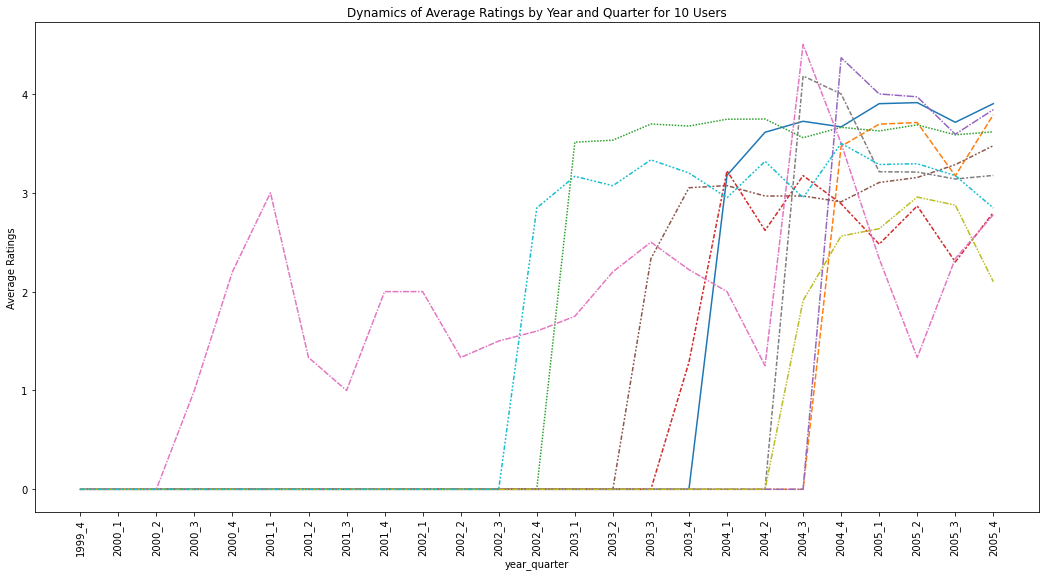

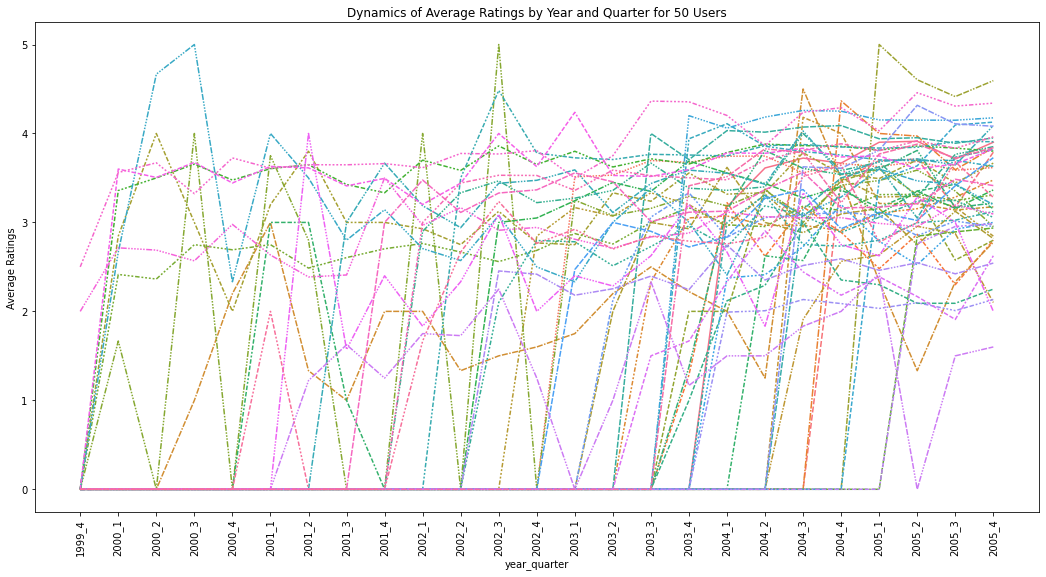

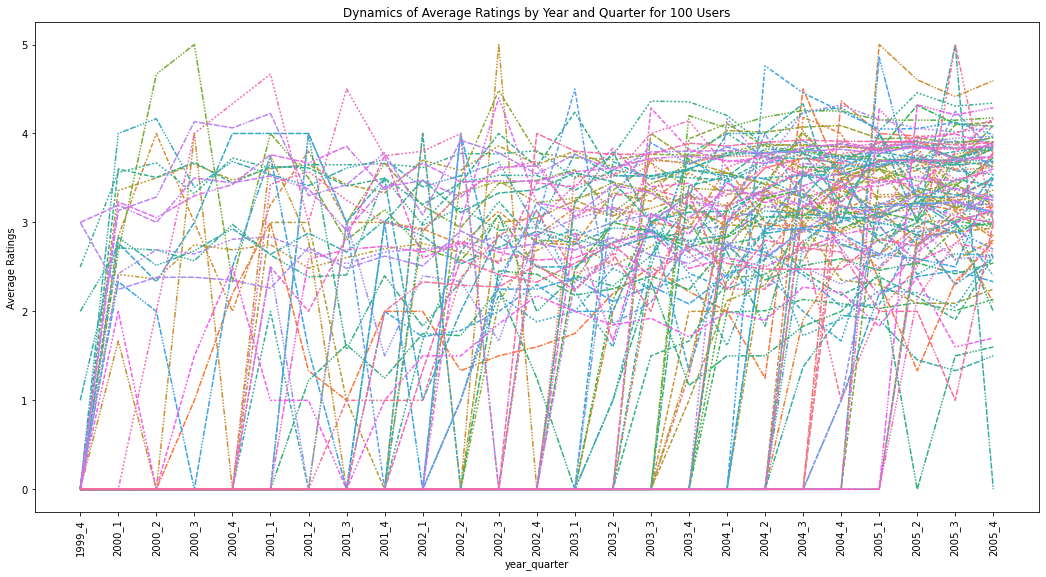

In [42]:
plt.figure(figsize=(18,9))
fig1 = sb.lineplot(data=pivot.iloc[:,0:10], legend = None )
fig1.set(ylabel = "Average Ratings")
plt.title("Dynamics of Average Ratings by Year and Quarter for 10 Users")
plt.xticks(rotation=90)

plt.figure(figsize=(18,9))
fig2 = sb.lineplot(data=pivot.iloc[:,0:50], legend = None)
fig2.set(ylabel = "Average Ratings")
plt.title("Dynamics of Average Ratings by Year and Quarter for 50 Users")
plt.xticks(rotation=90)

plt.figure(figsize=(18,9))
fig3 = sb.lineplot(data=pivot.iloc[:,0:100], legend = None)
fig3.set(ylabel = "Average Ratings")
plt.title("Dynamics of Average Ratings by Year and Quarter for 100 Users")
plt.xticks(rotation=90)



plt.savefig("output-1.jpg")


